First, load the CSV files and concatenate them to make it. Adding the column of each CSV file and making the new column if the column already not present in data frame.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D
from itertools import product
# For seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose, STL
# Import additional functions needed
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# to measure model performance
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
# To model with sklearn
from sklearn.linear_model import Lasso, Ridge, LinearRegression, HuberRegressor, ElasticNet
from sklearn.utils.validation import check_is_fitted


## DATA Visualization 

In [2]:
# # Concatenate all the CSV of Brighton to one CSV file 

# # Step 1: Define a function to concatenate CSV files
# def concatenate_csv_files(file_pattern):
#     # Step 2: Read CSV files into a list of DataFrames
#     dfs = []
#     for file in sorted(glob.glob(file_pattern)):
#         df = pd.read_csv(file)
        
#         # Check if column headers are numeric
#         if df.columns[0].isdigit():
#             # Set the first row as column headers
#             df.columns = df.iloc[0]
#             # Drop the first row after setting it as column headers
#             df = df.drop(0)
        
#         dfs.append(df)
    
#     # Step 3: Concatenate DataFrames
#     concatenated_df = pd.concat(dfs, ignore_index=True)
    
#     # Step 4: Export concatenated DataFrame to a new CSV file
#     concatenated_df.to_csv('concatenated_data.csv', index=False)

# # Example usage: Concatenate all CSV files in the current directory
# concatenate_csv_files('brighton_*.csv')


In [3]:
#Read the new concatenated file in a new data frame
df=pd.read_csv('concatenated_data.csv')
print("length of data", len(df))
df


length of data 122844


,datetime,temp,dew,humidity,precip,precipprob,preciptype,snow,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex
0,2010-01-01T00:00:00,1.9,-0.5,84.25,0.417,100.0,"rain,snow",0.0,0.0,19.4,11.0,999.9,62.2,0.0,0.0,0.0
1,2010-01-01T01:00:00,1.9,-0.5,83.90,0.000,0.0,NaN,0.0,0.0,21.8,19.0,999.8,22.4,0.0,0.0,0.0
2,2010-01-01T02:00:00,1.4,-0.7,85.76,0.000,0.0,NaN,0.0,0.0,17.7,10.0,1000.0,38.0,0.0,0.0,0.0
3,2010-01-01T03:00:00,1.4,-0.7,85.69,0.000,0.0,NaN,0.0,0.0,18.0,11.0,1000.2,66.7,0.0,0.0,0.0
4,2010-01-01T04:00:00,1.3,-0.8,85.72,0.000,0.0,NaN,0.0,0.0,17.4,10.0,1000.5,62.8,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122839,2024-01-06T07:00:00,5.1,3.5,89.07,NaN,0.0,NaN,NaN,NaN,9.6,327.0,1013.2,65.1,0.0,0.0,0.0
122840,2024-01-06T08:00:00,5.0,3.5,90.24,NaN,0.0,NaN,NaN,NaN,8.9,320.0,1014.0,89.9,0.0,0.0,0.0
122841,2024-01-06T09:00:00,4.9,3.9,92.89,NaN,0.0,NaN,NaN,NaN,9.6,321.0,1015.0,85.5,23.0,0.1,0.0
122842,2024-01-06T10:00:00,5.9,4.8,92.47,NaN,0.0,NaN,NaN,NaN,7.8,340.0,1016.0,51.7,72.0,0.3,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122844 entries, 0 to 122843
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   datetime          122844 non-null  object 
 1   temp              122590 non-null  float64
 2   dew               122568 non-null  float64
 3   humidity          122575 non-null  float64
 4   precip            122565 non-null  float64
 5   precipprob        122558 non-null  float64
 6   preciptype        11277 non-null   object 
 7   snow              89810 non-null   float64
 8   snowdepth         89279 non-null   float64
 9   windspeed         122583 non-null  float64
 10  winddir           122567 non-null  float64
 11  sealevelpressure  122319 non-null  float64
 12  cloudcover        122556 non-null  float64
 13  solarradiation    122514 non-null  float64
 14  solarenergy       122480 non-null  float64
 15  uvindex           122486 non-null  float64
dtypes: float64(14), obje

*Since preciptype, snow and snowdepth have very little data record and extroplating the data in this case is not possible therefore we can drop these columns*

In [5]:
df.drop(['preciptype', 'snow', 'snowdepth'], axis=1, inplace=True)
df

,datetime,temp,dew,humidity,precip,precipprob,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex
0,2010-01-01T00:00:00,1.9,-0.5,84.25,0.417,100.0,19.4,11.0,999.9,62.2,0.0,0.0,0.0
1,2010-01-01T01:00:00,1.9,-0.5,83.90,0.000,0.0,21.8,19.0,999.8,22.4,0.0,0.0,0.0
2,2010-01-01T02:00:00,1.4,-0.7,85.76,0.000,0.0,17.7,10.0,1000.0,38.0,0.0,0.0,0.0
3,2010-01-01T03:00:00,1.4,-0.7,85.69,0.000,0.0,18.0,11.0,1000.2,66.7,0.0,0.0,0.0
4,2010-01-01T04:00:00,1.3,-0.8,85.72,0.000,0.0,17.4,10.0,1000.5,62.8,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122839,2024-01-06T07:00:00,5.1,3.5,89.07,NaN,0.0,9.6,327.0,1013.2,65.1,0.0,0.0,0.0
122840,2024-01-06T08:00:00,5.0,3.5,90.24,NaN,0.0,8.9,320.0,1014.0,89.9,0.0,0.0,0.0
122841,2024-01-06T09:00:00,4.9,3.9,92.89,NaN,0.0,9.6,321.0,1015.0,85.5,23.0,0.1,0.0
122842,2024-01-06T10:00:00,5.9,4.8,92.47,NaN,0.0,7.8,340.0,1016.0,51.7,72.0,0.3,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122844 entries, 0 to 122843
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   datetime          122844 non-null  object 
 1   temp              122590 non-null  float64
 2   dew               122568 non-null  float64
 3   humidity          122575 non-null  float64
 4   precip            122565 non-null  float64
 5   precipprob        122558 non-null  float64
 6   windspeed         122583 non-null  float64
 7   winddir           122567 non-null  float64
 8   sealevelpressure  122319 non-null  float64
 9   cloudcover        122556 non-null  float64
 10  solarradiation    122514 non-null  float64
 11  solarenergy       122480 non-null  float64
 12  uvindex           122486 non-null  float64
dtypes: float64(12), object(1)
memory usage: 12.2+ MB


Since all the data types are in float 64 we now have to change the datetime to pandas date time data frame. Now we have data cleaned and can move on to filling the missing values. we use many methods such as forward fill or backwords fill or linear. 

In [7]:
df['datetime'] = pd.to_datetime(df['datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122844 entries, 0 to 122843
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   datetime          122844 non-null  datetime64[ns]
 1   temp              122590 non-null  float64       
 2   dew               122568 non-null  float64       
 3   humidity          122575 non-null  float64       
 4   precip            122565 non-null  float64       
 5   precipprob        122558 non-null  float64       
 6   windspeed         122583 non-null  float64       
 7   winddir           122567 non-null  float64       
 8   sealevelpressure  122319 non-null  float64       
 9   cloudcover        122556 non-null  float64       
 10  solarradiation    122514 non-null  float64       
 11  solarenergy       122480 non-null  float64       
 12  uvindex           122486 non-null  float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 12.2 MB


In [8]:
# Now that pandas knows the 'date' column contains a date, we can check the range of dates in our data
print(df['datetime'].min(), df['datetime'].max())

2010-01-01 00:00:00 2024-01-06 11:00:00


In [9]:
# Let's say we want to create extra columns: month, year, and week of the year
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['week_of_year'] = df['datetime'].dt.isocalendar().week
df

,datetime,temp,dew,humidity,precip,precipprob,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,month,year,week_of_year
0,2010-01-01 00:00:00,1.9,-0.5,84.25,0.417,100.0,19.4,11.0,999.9,62.2,0.0,0.0,0.0,1,2010,53
1,2010-01-01 01:00:00,1.9,-0.5,83.90,0.000,0.0,21.8,19.0,999.8,22.4,0.0,0.0,0.0,1,2010,53
2,2010-01-01 02:00:00,1.4,-0.7,85.76,0.000,0.0,17.7,10.0,1000.0,38.0,0.0,0.0,0.0,1,2010,53
3,2010-01-01 03:00:00,1.4,-0.7,85.69,0.000,0.0,18.0,11.0,1000.2,66.7,0.0,0.0,0.0,1,2010,53
4,2010-01-01 04:00:00,1.3,-0.8,85.72,0.000,0.0,17.4,10.0,1000.5,62.8,0.0,0.0,0.0,1,2010,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122839,2024-01-06 07:00:00,5.1,3.5,89.07,NaN,0.0,9.6,327.0,1013.2,65.1,0.0,0.0,0.0,1,2024,1
122840,2024-01-06 08:00:00,5.0,3.5,90.24,NaN,0.0,8.9,320.0,1014.0,89.9,0.0,0.0,0.0,1,2024,1
122841,2024-01-06 09:00:00,4.9,3.9,92.89,NaN,0.0,9.6,321.0,1015.0,85.5,23.0,0.1,0.0,1,2024,1
122842,2024-01-06 10:00:00,5.9,4.8,92.47,NaN,0.0,7.8,340.0,1016.0,51.7,72.0,0.3,1.0,1,2024,1


In [10]:
#The feedback was provided in the previous assignment that missing times (hours) was checked here we check for missing hours 
# Generate a sequence of dates covering the range of dates in 'datetime' column
min_date = df['datetime'].min()
max_date = df['datetime'].max()
#here we include the frequency hours to check for the missing hours since the data is stored hourly
date_range = pd.date_range(start=min_date, end=max_date, freq='H')

# Compare the generated sequence of dates with the dates in 'datetime' column
missing_dates = date_range[~date_range.isin(df['datetime'])]

# Print the missing dates, if any
if len(missing_dates) > 0:
    print("Missing dates:")
    print(missing_dates)
    print("Total Missing date_time", len(missing_dates))
else:
    print("No missing dates.")


Missing dates:
DatetimeIndex(['2010-03-28 01:00:00', '2011-03-27 01:00:00',
               '2012-03-25 01:00:00', '2013-03-31 01:00:00',
               '2014-03-30 01:00:00', '2015-03-29 01:00:00',
               '2016-03-27 01:00:00', '2017-03-26 01:00:00',
               '2018-03-25 01:00:00', '2019-03-31 01:00:00',
               '2020-03-29 01:00:00', '2021-03-28 01:00:00',
               '2022-03-27 01:00:00', '2023-03-26 01:00:00'],
              dtype='datetime64[ns]', freq=None)
Total Missing date_time 14


In [11]:
# # Let's make the date column the index of the dataframe for easier slicing
df.set_index('datetime', inplace=True) # note we can only run this once, as it will delete the 'date' column.
df

,temp,dew,humidity,precip,precipprob,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,month,year,week_of_year
datetime,,,,,,,,,,,,,,,
2010-01-01 00:00:00,1.9,-0.5,84.25,0.417,100.0,19.4,11.0,999.9,62.2,0.0,0.0,0.0,1,2010,53
2010-01-01 01:00:00,1.9,-0.5,83.90,0.000,0.0,21.8,19.0,999.8,22.4,0.0,0.0,0.0,1,2010,53
2010-01-01 02:00:00,1.4,-0.7,85.76,0.000,0.0,17.7,10.0,1000.0,38.0,0.0,0.0,0.0,1,2010,53
2010-01-01 03:00:00,1.4,-0.7,85.69,0.000,0.0,18.0,11.0,1000.2,66.7,0.0,0.0,0.0,1,2010,53
2010-01-01 04:00:00,1.3,-0.8,85.72,0.000,0.0,17.4,10.0,1000.5,62.8,0.0,0.0,0.0,1,2010,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-06 07:00:00,5.1,3.5,89.07,NaN,0.0,9.6,327.0,1013.2,65.1,0.0,0.0,0.0,1,2024,1
2024-01-06 08:00:00,5.0,3.5,90.24,NaN,0.0,8.9,320.0,1014.0,89.9,0.0,0.0,0.0,1,2024,1
2024-01-06 09:00:00,4.9,3.9,92.89,NaN,0.0,9.6,321.0,1015.0,85.5,23.0,0.1,0.0,1,2024,1


In [12]:
#check for the duplicate dates
print(len(df))
duplicates=df[df.index.duplicated(keep=False)]
print(len(duplicates))
# Let's keep the first one only
df = df[~df.index.duplicated(keep='first')]
len(df)

122844
28


122830

In [13]:
#The feedback was provided in the previous assignment that missing times (hours) was checked here we check for missing hours and fill missing values.


min_date = df.index.min()
max_date = df.index.max()
hourly_range = pd.date_range(start=min_date, end=max_date, freq='H')  # 'H' frequency represents hourly

# Reindex the DataFrame by hourly intervals
# This will fill in any missing hours with NaN values
reindexed_df = df.reindex(hourly_range)

# Check for missing hours in the DateTime index
missing_hours = reindexed_df.isnull().all(1).sum()
print("Number of missing hours:", missing_hours)

#we checked in two way if there are missing time once in the block 10 and once we use the here in this block using the reindex method as discussed
#in class and we get the same answer 14 which means we are on right track there are 14 missing dates. we now chnage the original datframe

df=reindexed_df
df

Number of missing hours: 14


,temp,dew,humidity,precip,precipprob,windspeed,winddir,sealevelpressure,cloudcover,solarradiation,solarenergy,uvindex,month,year,week_of_year
2010-01-01 00:00:00,1.9,-0.5,84.25,0.417,100.0,19.4,11.0,999.9,62.2,0.0,0.0,0.0,1.0,2010.0,53
2010-01-01 01:00:00,1.9,-0.5,83.90,0.000,0.0,21.8,19.0,999.8,22.4,0.0,0.0,0.0,1.0,2010.0,53
2010-01-01 02:00:00,1.4,-0.7,85.76,0.000,0.0,17.7,10.0,1000.0,38.0,0.0,0.0,0.0,1.0,2010.0,53
2010-01-01 03:00:00,1.4,-0.7,85.69,0.000,0.0,18.0,11.0,1000.2,66.7,0.0,0.0,0.0,1.0,2010.0,53
2010-01-01 04:00:00,1.3,-0.8,85.72,0.000,0.0,17.4,10.0,1000.5,62.8,0.0,0.0,0.0,1.0,2010.0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-06 07:00:00,5.1,3.5,89.07,NaN,0.0,9.6,327.0,1013.2,65.1,0.0,0.0,0.0,1.0,2024.0,1
2024-01-06 08:00:00,5.0,3.5,90.24,NaN,0.0,8.9,320.0,1014.0,89.9,0.0,0.0,0.0,1.0,2024.0,1
2024-01-06 09:00:00,4.9,3.9,92.89,NaN,0.0,9.6,321.0,1015.0,85.5,23.0,0.1,0.0,1.0,2024.0,1
2024-01-06 10:00:00,5.9,4.8,92.47,NaN,0.0,7.8,340.0,1016.0,51.7,72.0,0.3,1.0,1.0,2024.0,1


In [14]:
# Check if we have any missing values in our dataset.
print(df.isna().any())  # or sum() if we want a count of how many per column

temp                True
dew                 True
humidity            True
precip              True
precipprob          True
windspeed           True
winddir             True
sealevelpressure    True
cloudcover          True
solarradiation      True
solarenergy         True
uvindex             True
month               True
year                True
week_of_year        True
dtype: bool


In [15]:
#sum() if we want a count of how many per column
print(df.isna().sum())

temp                268
dew                 290
humidity            283
precip              293
precipprob          300
windspeed           275
winddir             291
sealevelpressure    539
cloudcover          302
solarradiation      344
solarenergy         378
uvindex             372
month                14
year                 14
week_of_year         14
dtype: int64


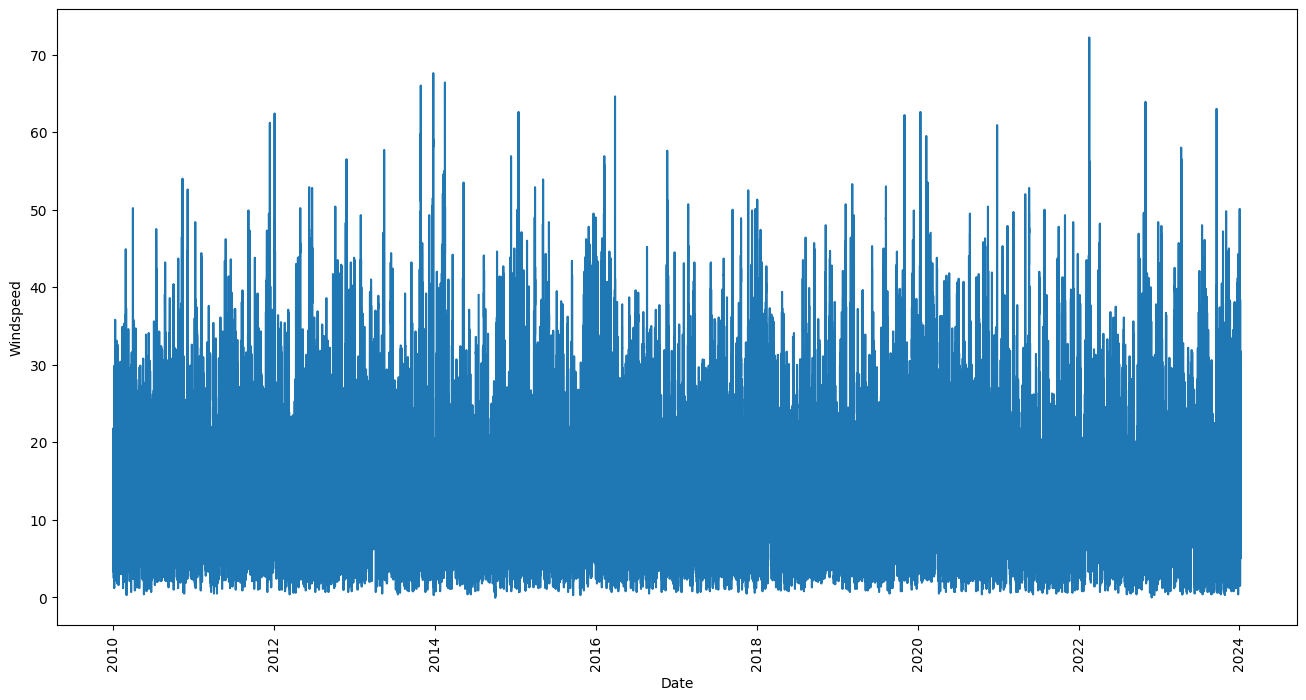

In [16]:
plt.figure(figsize=(16,8))
plt.plot(df.index, df['windspeed'])  # Use df.index for the datetime index
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Windspeed')
plt.show()

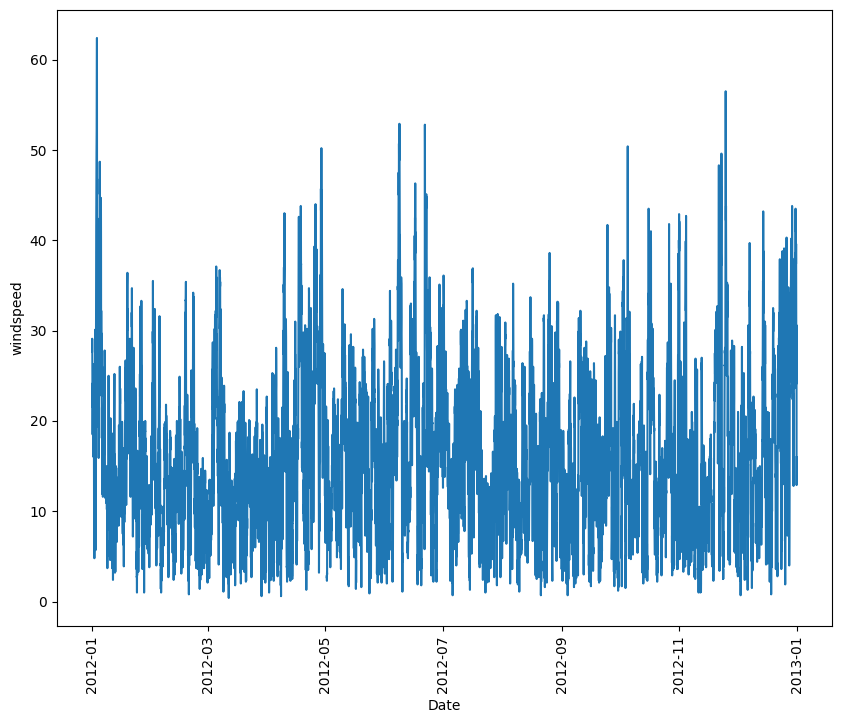

In [17]:
# Let's zoom in to 2012-2013
df_chunk = df.loc['2012-01':'2012-12']  # since the date is an index, we can use it to filter our data

plt.figure(figsize=(10, 8))
plt.plot(df_chunk.index, df_chunk['windspeed'])
plt.xticks(rotation=90)
plt.xlabel('Date')
_=plt.ylabel('windspeed')

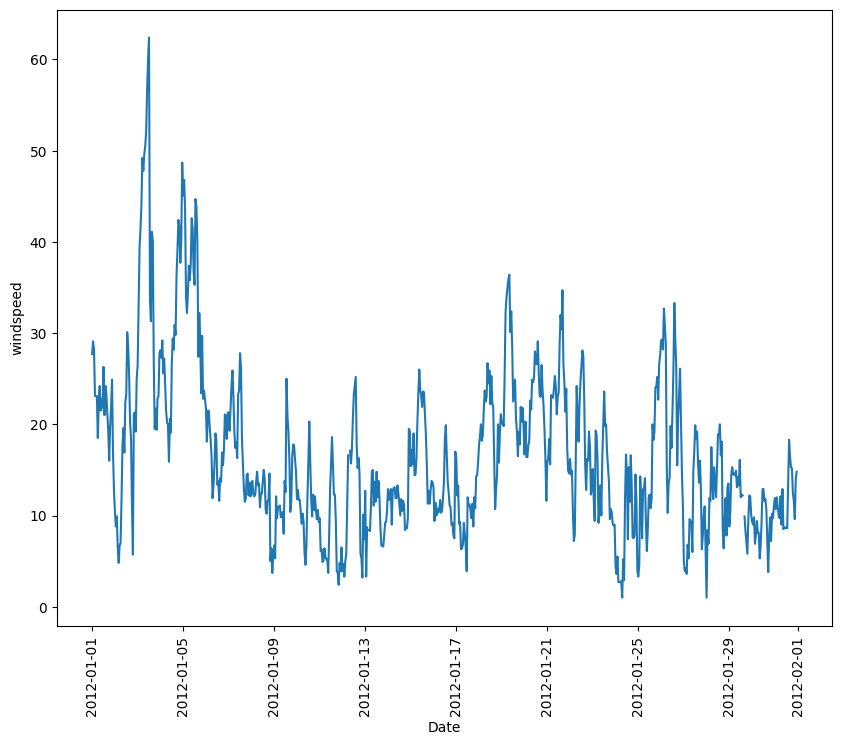

In [18]:
# Let's zoom in to 2012 one month
df_chunk = df.loc['2012-01':'2012-01']  # since the date is an index, we can use it to filter our data

plt.figure(figsize=(10, 8))
plt.plot(df_chunk.index, df_chunk['windspeed'])
plt.xticks(rotation=90)
plt.xlabel('Date')
_=plt.ylabel('windspeed')

There are some missing Values for one day 2012-01-30.

Assumption 1: I am assuming that that the Brighton has only windturbines and I am using the windspeed to do my data analysis and mathematical calculation for the surplus energy.

Keeping in view lets take the wind speed column make a copy and fill the missing vlaues 

In [19]:
df_windspeed = df.loc[:, 'windspeed'].to_frame()
df_windspeed

,windspeed
2010-01-01 00:00:00,19.4
2010-01-01 01:00:00,21.8
2010-01-01 02:00:00,17.7
2010-01-01 03:00:00,18.0
2010-01-01 04:00:00,17.4
...,...
2024-01-06 07:00:00,9.6
2024-01-06 08:00:00,8.9
2024-01-06 09:00:00,9.6
2024-01-06 10:00:00,7.8


Text(0, 0.5, 'windspeed')

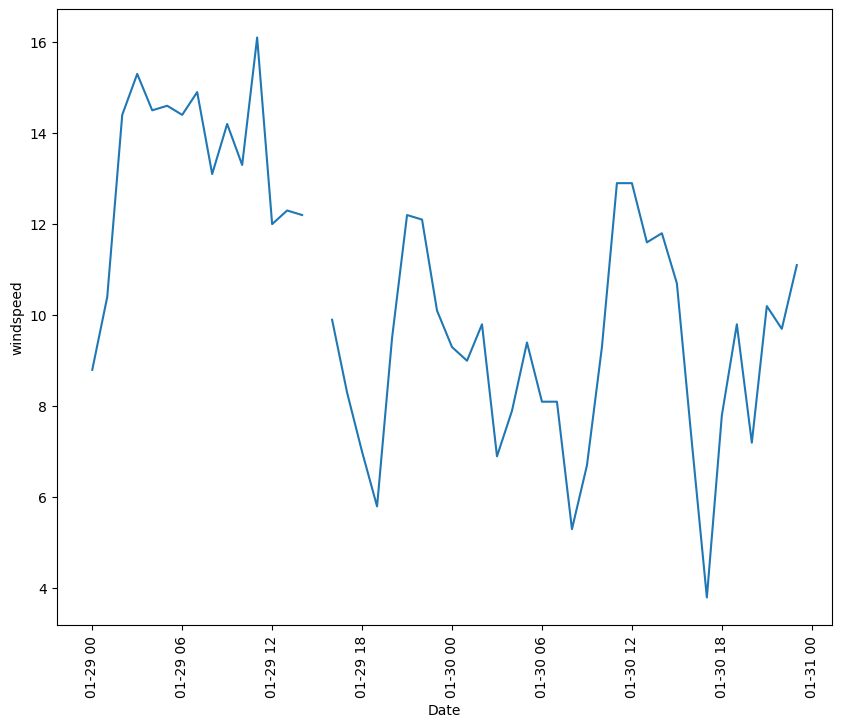

In [20]:
df_windspeed_missingchunk = df.loc['2012-01-29':'2012-01-30', 'windspeed'].to_frame()
plt.figure(figsize=(10, 8))
plt.plot(df_windspeed_missingchunk.index, df_windspeed_missingchunk ['windspeed'])
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('windspeed')



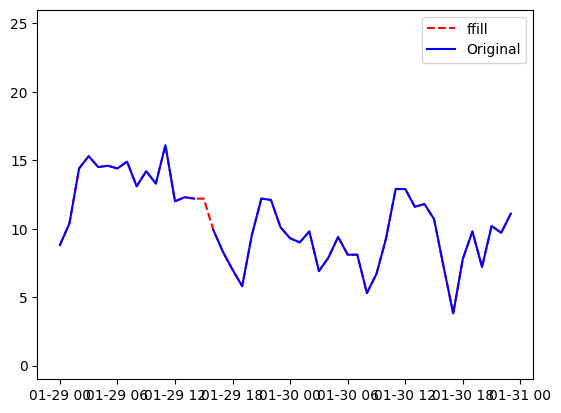

In [21]:

# Forward Fill missing chunk
df_windspeed_missingchunk['ffill'] = df_windspeed_missingchunk['windspeed'].ffill()

# Plot
plt.plot(df_windspeed_missingchunk.index, df_windspeed_missingchunk['ffill'], label='ffill', linestyle='--', color='red')
plt.plot(df_windspeed_missingchunk.index, df_windspeed_missingchunk['windspeed'], color='blue', label='Original')
plt.legend()
plt.ylim(-1, 26)
plt.show()


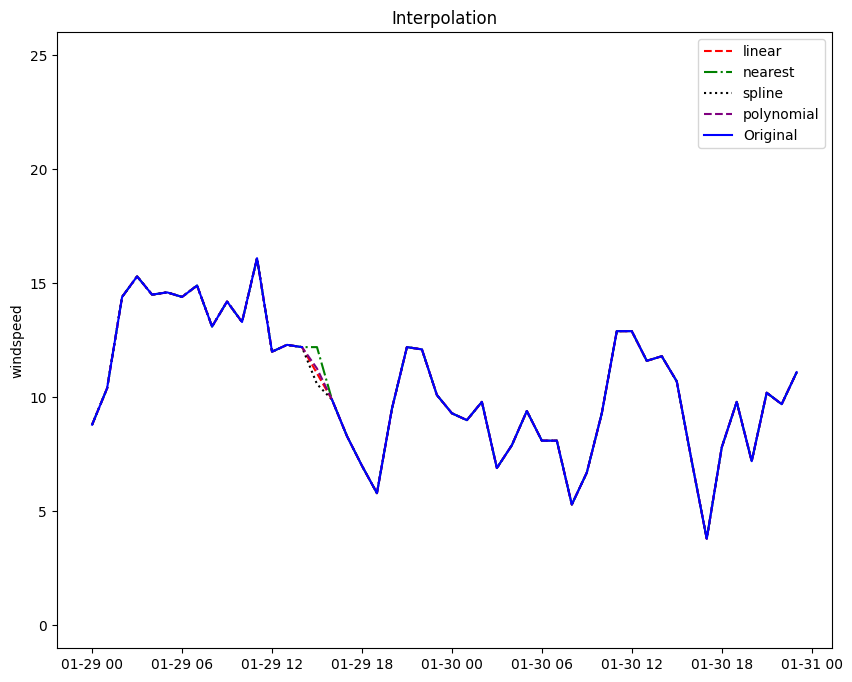

In [22]:
# Trying different ways to fill the data 

df_windspeed_missingchunk['linear_interp'] = df_windspeed_missingchunk['windspeed'].interpolate(method='linear')
df_windspeed_missingchunk['nearest_interp'] = df_windspeed_missingchunk['windspeed'].interpolate(method='nearest')
df_windspeed_missingchunk['spline_interp'] = df_windspeed_missingchunk['windspeed'].interpolate(method='spline', order=2)
df_windspeed_missingchunk['polynomial_interp'] = df_windspeed_missingchunk['windspeed'].interpolate(method="polynomial", order=3)

# Plot
fig, ax = plt.subplots(figsize=(10,8))

plt.plot(df_windspeed_missingchunk.index, df_windspeed_missingchunk['linear_interp'], linestyle='--', color='red', label='linear')
plt.plot(df_windspeed_missingchunk.index, df_windspeed_missingchunk['nearest_interp'], linestyle='-.', color='green', label='nearest')
plt.plot(df_windspeed_missingchunk.index, df_windspeed_missingchunk['spline_interp'], linestyle=':', color='black', label='spline')
plt.plot(df_windspeed_missingchunk.index, df_windspeed_missingchunk['polynomial_interp'], linestyle='--', color='purple', label='polynomial')
plt.plot(df_windspeed_missingchunk.index, df_windspeed_missingchunk['windspeed'], label='Original', color='blue')

plt.legend()
plt.ylabel('windspeed')
plt.ylim(-1, 26)
_=plt.title('Interpolation')

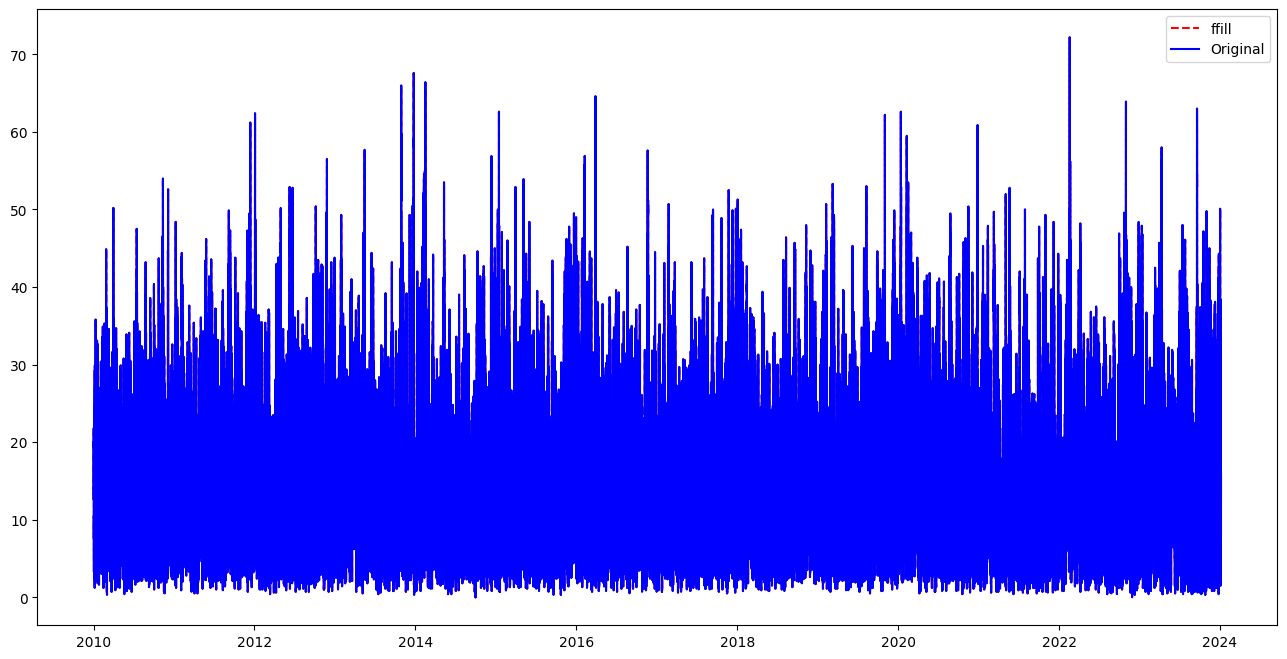

,windspeed,ffill
2010-01-01 00:00:00,19.4,19.4
2010-01-01 01:00:00,21.8,21.8
2010-01-01 02:00:00,17.7,17.7
2010-01-01 03:00:00,18.0,18.0
2010-01-01 04:00:00,17.4,17.4
...,...,...
2024-01-06 07:00:00,9.6,9.6
2024-01-06 08:00:00,8.9,8.9
2024-01-06 09:00:00,9.6,9.6
2024-01-06 10:00:00,7.8,7.8


In [23]:

# Forward Fill the windspeed data. This could be either due to not recording of vlaue or due to missing date-time that we checked earlier
df_windspeed['ffill'] = df_windspeed['windspeed'].ffill()

# Plot
plt.figure(figsize=(16,8))
plt.plot(df_windspeed.index, df_windspeed['ffill'], label='ffill', linestyle='--', color='red')
plt.plot(df_windspeed.index, df_windspeed['windspeed'], color='blue', label='Original')
plt.legend()
plt.show()
df_windspeed

In [24]:
#we check here that there is no nan value in the forward fill
df_windspeed.isna().any()

windspeed     True
ffill        False
dtype: bool

In [25]:
#we drop the column windspeed and us the forward fill as the windspeed data
df_windspeed = df_windspeed.drop(columns=['windspeed']).rename(columns={'ffill': 'windspeed'})

print("Total Missing values from windspeed", df_windspeed.isna().any().sum())
df_windspeed





Total Missing values from windspeed 0


,windspeed
2010-01-01 00:00:00,19.4
2010-01-01 01:00:00,21.8
2010-01-01 02:00:00,17.7
2010-01-01 03:00:00,18.0
2010-01-01 04:00:00,17.4
...,...
2024-01-06 07:00:00,9.6
2024-01-06 08:00:00,8.9
2024-01-06 09:00:00,9.6
2024-01-06 10:00:00,7.8


In [55]:
# we want to save it to 'windspeed_data.csv' so that we can use that for other notebook for deploying ML models
df_windspeed.to_csv('windspeed_data.csv', index=True)


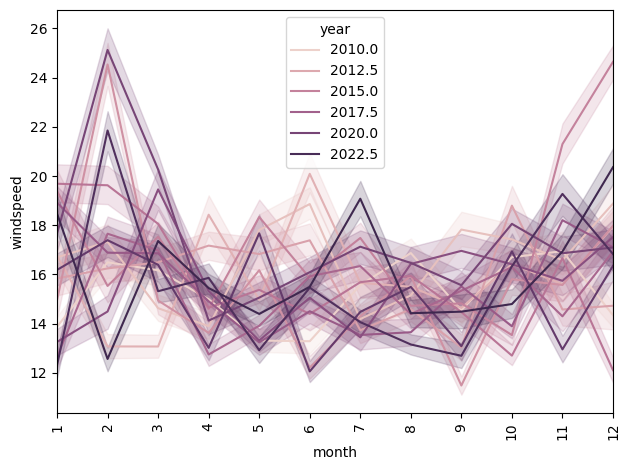

In [27]:
# Visualise trends across years
df_seasonal = df.copy()

sns.lineplot(x='month', y='windspeed', data=df_seasonal, hue='year')
_=plt.xticks(np.arange(1, 13), rotation=90)
_=plt.xlim(1, 12)  # limit x-axis
_=plt.tight_layout()
_=plt.savefig('./trend_lineplot.pdf', dpi=1000)

## Checking Stationarity

In [28]:
# Time series decomposition
# Let's downsample our timeseries first: average temperatures per month
data_Monthly = df_windspeed['windspeed'].resample('M').mean().ffill().to_frame()  # one value per month
data_Monthly


,windspeed
2010-01-31,13.873118
2010-02-28,16.484226
2010-03-31,16.154167
2010-04-30,14.993472
2010-05-31,13.326075
...,...
2023-09-30,14.473194
2023-10-31,14.786828
2023-11-30,16.932222
2023-12-31,20.354032


In [29]:
#we can see there is no seasonlity in windspeed and from the graph of block 23 we can see the mean and the varaince are constant. we move on to check
#ADF test for stationarity 
# Statistical test for stationarity: Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(data_Monthly['windspeed'])
print('ADF Statistic %.2f:' % adf_result[0])
print('ADF p-value: %.4f:' % adf_result[1])
# p-value << 0.05 ==> timeseries does not have a unit root

ADF Statistic -10.82:
ADF p-value: 0.0000:


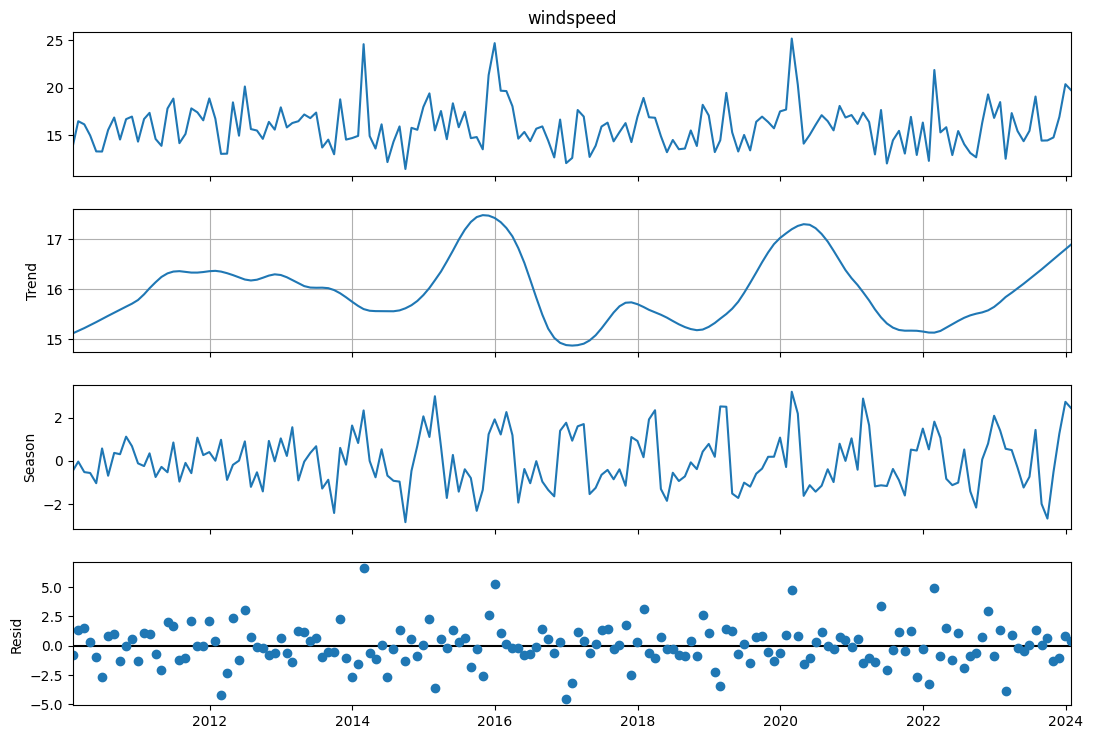

In [30]:
# decomposition on the resampled dataset
decomposition = STL(data_Monthly['windspeed']).fit()
fig = decomposition.plot()
fig.set_size_inches(12,8)
fig.axes[1].grid() # so we can check a bit better if there's a trend or not
plt.savefig('./avg_temp_decomp.pdf', dpi=1000)

It can be varified mathematically from ADF test and decomposition that that data is stationary and there is no seasonility.
p-value < 0.05 means the time series does not have a unit root and is stationary and this is further strengthened by graphs.

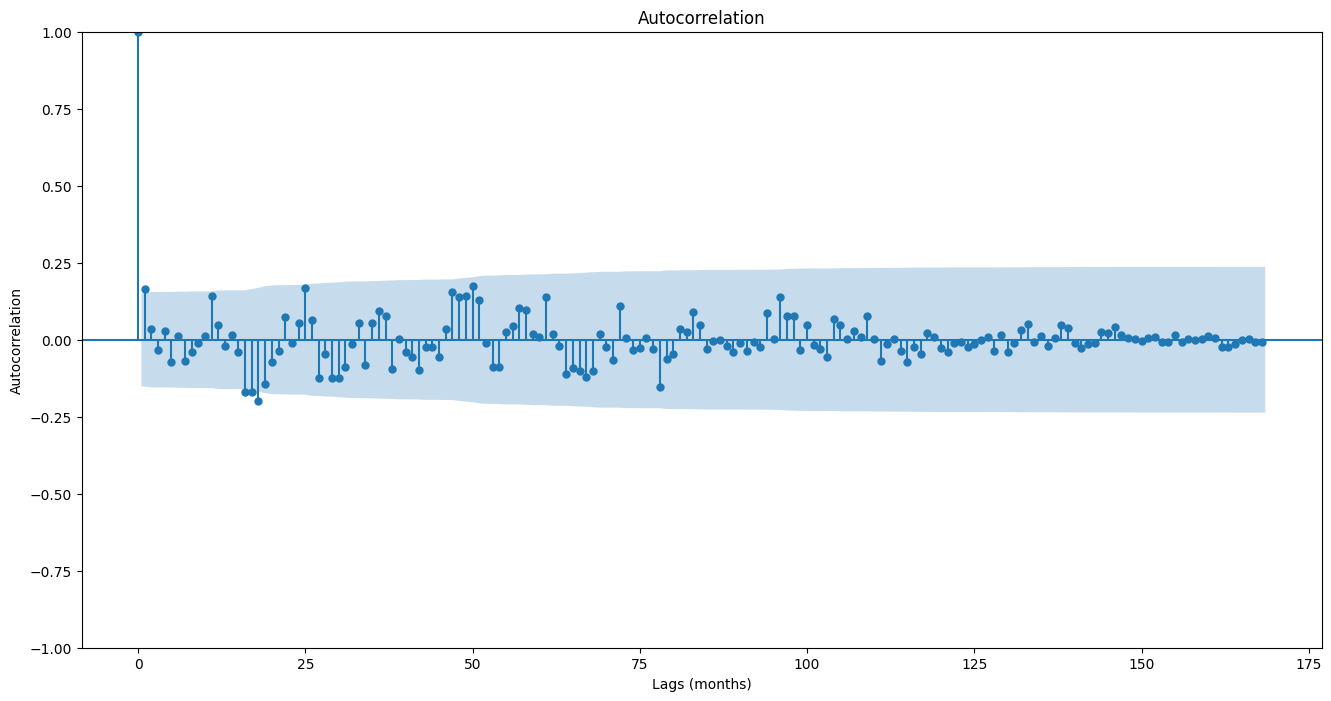

In [31]:
# Autocorrelation 
fig, ax = plt.subplots(figsize=(16,8))
_=plot_acf(data_Monthly['windspeed'], lags=168, ax=ax)  # each lag is one month, 14 years worth of past data
_=plt.xlabel('Lags (months)')
_=plt.ylabel('Autocorrelation')


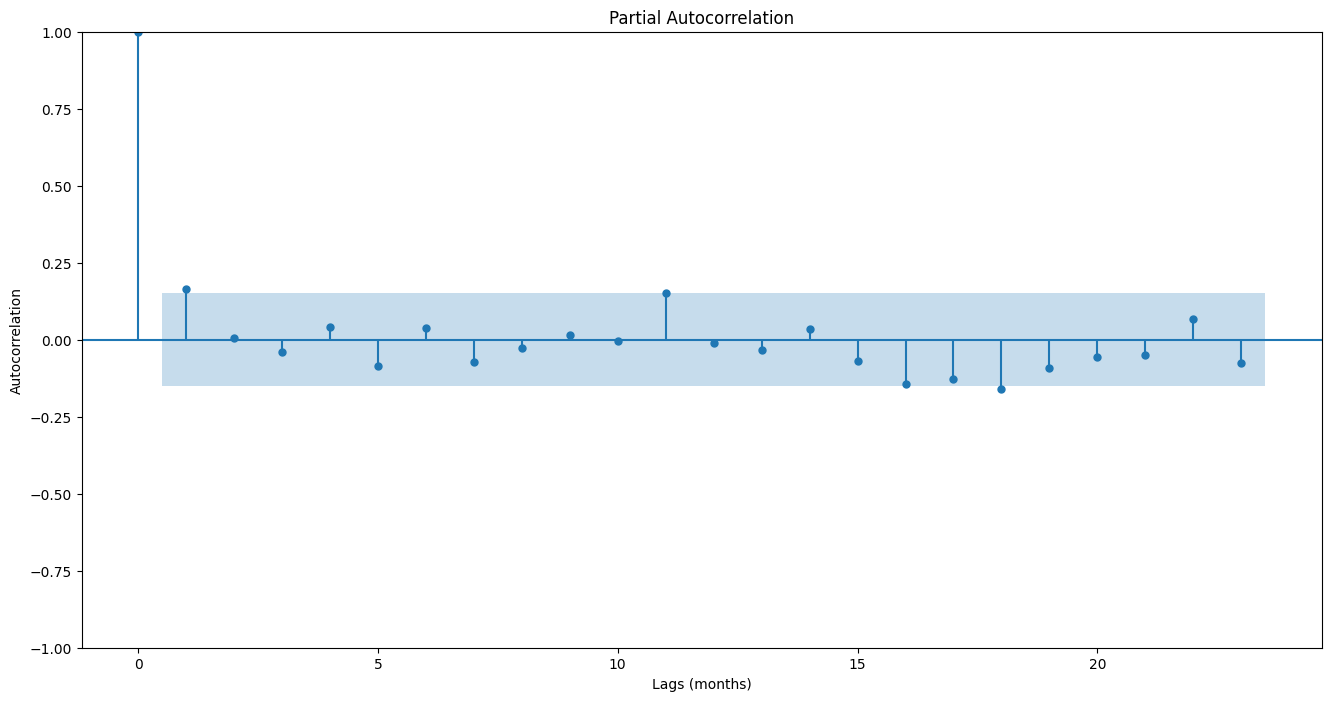

In [32]:
# partial- Autocorrelation 
fig, ax = plt.subplots(figsize=(16,8))
_=plot_pacf(data_Monthly['windspeed'], ax=ax)  # each lag is one month, 14 years worth of past data
_=plt.xlabel('Lags (months)')
_=plt.ylabel('Autocorrelation')